## Загрузка данных и знакомство с ними

In [79]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [80]:
import pandas as pd

file_path = '/Users/sergejvaresko/iis_proj/data/car data.csv'
df = pd.read_csv(file_path)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [82]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Car_Name: категориальная переменная, представляющая модель транспортного средства, включая автомобили и мотоциклы.\
Year: числовое (целое), обозначающее год производства в диапазоне от 2003 до 2018.\
Selling_Price: **Целевой признак.** Числовое значение (с плавающей запятой), обозначающее цену, по которой продается автомобиль.\
Present_Price: числовое значение (с плавающей запятой), указывающее текущую рыночную стоимость автомобиля.\
Driven_kms: ​​числовое (целое), показывающее пройденные километры.\
Fuel_Type: категориальная переменная, указывающая тип используемого топлива (например, бензин, дизельное топливо, КПГ).\
Selling_type: категориальная переменная, обозначающая, продается ли автомобиль дилером или частным лицом.\
Transmission: Категориальная переменная, указывающая тип передачи\
Owner: числовое (целое), указывающее количество предыдущих владельцев автомобиля.

## Очистка данных

In [83]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [84]:
print(f'Duplicates in df: {df.duplicated().sum()}')
df = df.drop_duplicates()
print(f'Duplicates after drop_duplicates in df: {df.duplicated().sum()}')

Duplicates in df: 2
Duplicates after drop_duplicates in df: 0


In [85]:
df.drop(columns=['Car_Name'], inplace=True)

/var/folders/3f/x14h836923j7lv3kqcc_d9gc0000gn/T/ipykernel_19007/1316104760.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



столбец Car_Name не несет полезной иноформации для классификации, т.к. не реальных данных количество имен машин может быть неограничено, поэтому этот столбец был исключен из датасета

## Анализ признаков для модели

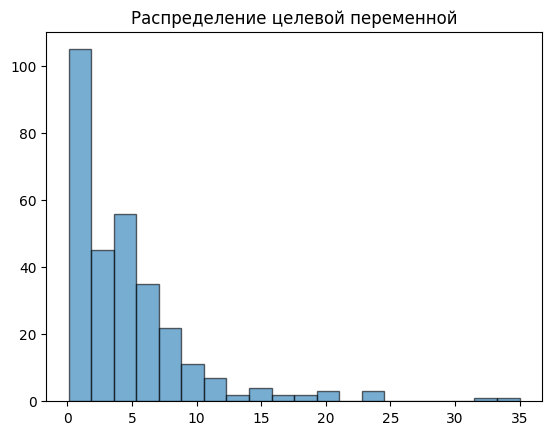

In [86]:
plt.hist(df['Selling_Price'], bins=20, edgecolor='black', alpha=0.6)
plt.title('Распределение целевой переменной')
plt.ylabel('');

График показывает распределение таргетной переменной
* Из графика видно, что есть значимый перекос кол-ва продаж от цены (при меньшей цене больше примеров продаж)\

**Почему перекос является проблемой:**

- Если целевая переменная сильно перекошена, это может повлиять на производительность регрессионных моделей, особенно линейных моделей, которые предполагают, что целевая переменная нормально распределена.

- Перекос может привести к предвзятым прогнозам и низкой производительности модели

**Интерпретация перекоса:**

- Если перекос находится между -0,5 и 0,5, распределение приблизительно симметричное.

- Если перекос > 0,5, распределение положительно перекошено вправо.

- Если перекос < -0,5, распределение отрицательно перекошено влево

**Как справиться с перекосом:**

- Преобразование журнала: np.log(Selling_Price)

- Преобразование квадратного корня: np.sqrt(Selling_Price)

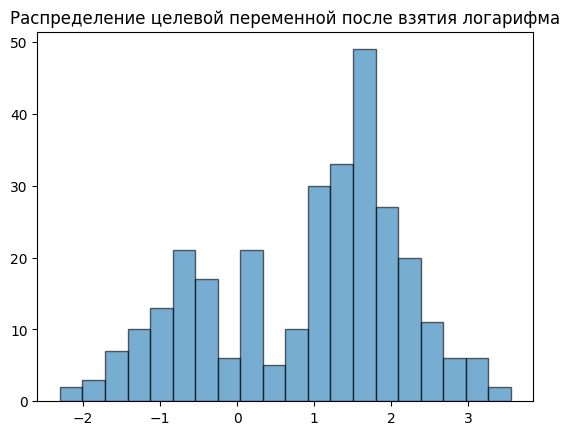

In [87]:
plt.hist(np.log(df['Selling_Price']), bins=20, edgecolor='black', alpha=0.6)
plt.title('Распределение целевой переменной после взятия логарифма');

Был выбран метод взятия логарифма от целевой перменной для приведения распределения близкого к нормальному

In [88]:
df['Selling_Price'] = np.log(df['Selling_Price'])

/var/folders/3f/x14h836923j7lv3kqcc_d9gc0000gn/T/ipykernel_19007/1583521514.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



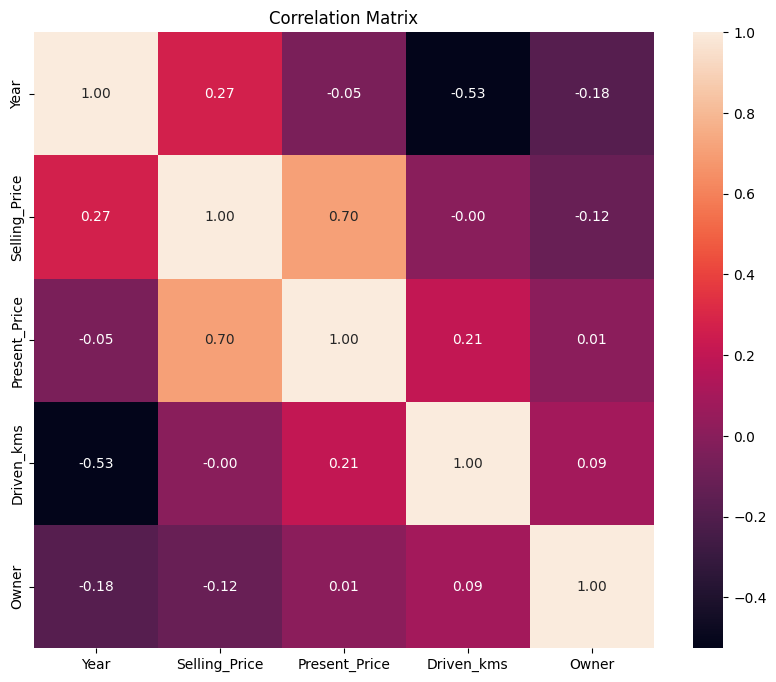

In [89]:
numerical_features = df.select_dtypes(include=["number"])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Матрица корреляций показывает сильную зависимость между Оценочной ценой и ценой продажи, что также может негативно повлиять на качество классификации.

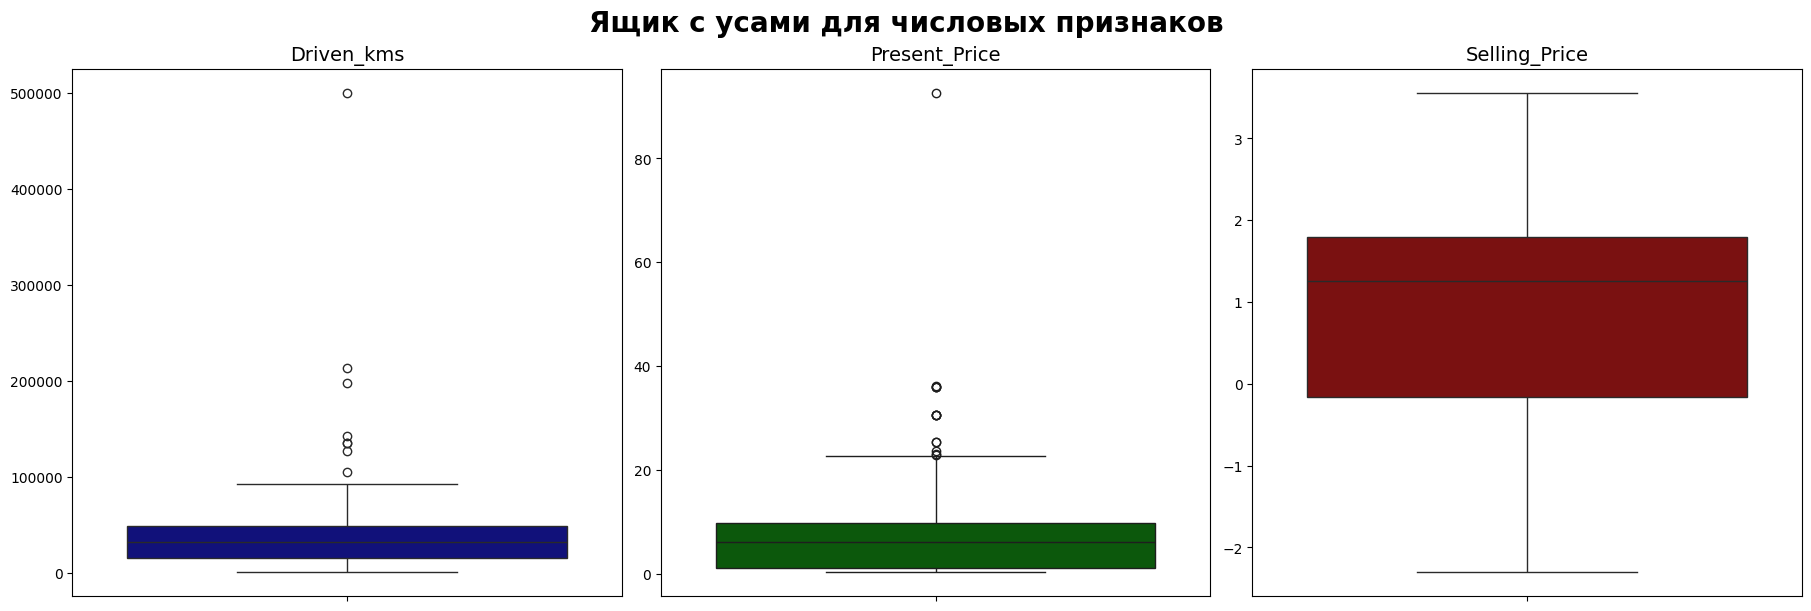

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

sns.boxplot(ax=axes[0], y=df['Driven_kms'], color='darkblue', showfliers=True)
axes[0].set_title('Driven_kms', fontsize=14)
axes[0].set_ylabel("") 

sns.boxplot(ax=axes[1], y=df['Present_Price'], color='darkgreen', showfliers=True)
axes[1].set_title('Present_Price', fontsize=14)
axes[1].set_ylabel("")

sns.boxplot(ax=axes[2], y=df['Selling_Price'], color='darkred', showfliers=True)
axes[2].set_title('Selling_Price', fontsize=14)
axes[2].set_ylabel("")

fig.suptitle('Ящик с усами для числовых признаков', fontsize=20, weight='bold')

plt.show()


У пробега и оценочной цены есть небольшое кол-во выбросов, но их кол-во не критично, поэтому данные столбцы постобработки не требуют.\
У таргетной переменной нет выбросов, имеется небольшое медианное смещение.

In [91]:
for col in numerical_features.columns:

    fig = px.line(df.sort_values('Selling_Price'), x='Selling_Price', y=col, title=f'Selling_Price vs {col}')
    fig.show()

В идеальном случае звисимость таргетной переменной от признаков должна быть представлена в виде белого шума.\
Распределение всех числовых признаков кроме Present_Price не имеют явной линейной зависимости. Зависимость от Present_Price имеет видимую корреляцию, что было также отмечено из корреляционной матрицы

- Создадим дополнительные признаки на основе комбинаций существующих с учетом взаимодействия между ними/
Это поможет учитывать нелинейные зависимости и сделает признаки "более общими" (особенно актуально для временных признаков)
Т.к. в нашем датасете 9 признаков, создание только новых не поможет в классификации, они будут коррелировать с уже имеющимися. 

In [92]:
current_year = 2025
df['Age_of_car'] = current_year - df['Year']

df['Car_depreciation'] = (df['Present_Price'] - df['Selling_Price']).round(3)


/var/folders/3f/x14h836923j7lv3kqcc_d9gc0000gn/T/ipykernel_19007/1703113978.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3f/x14h836923j7lv3kqcc_d9gc0000gn/T/ipykernel_19007/1703113978.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df.drop(columns=['Year','Present_Price'], inplace=True)

/var/folders/3f/x14h836923j7lv3kqcc_d9gc0000gn/T/ipykernel_19007/1878336772.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



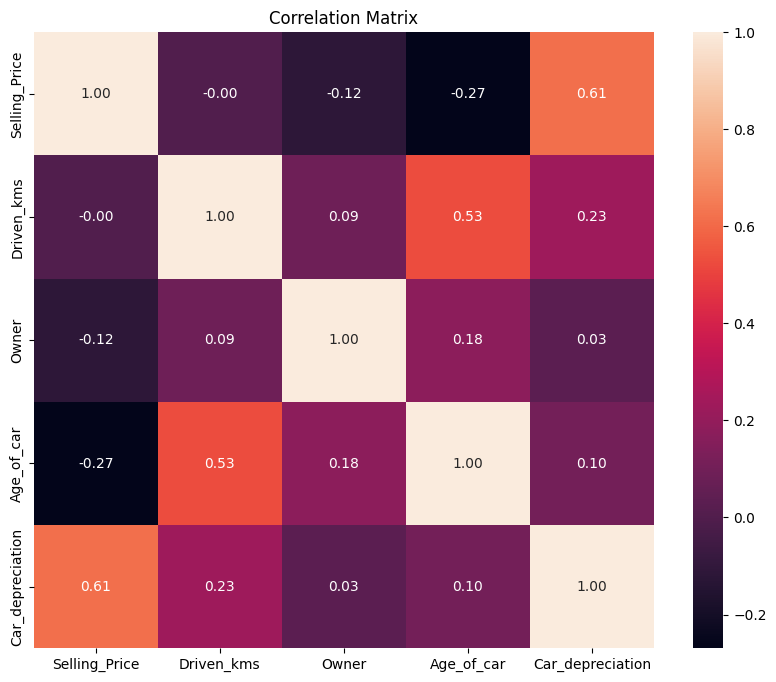

In [94]:
numerical_features = df.select_dtypes(include=["number"])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Создание нового признака Car_depreciation помогло понизить значение корреляции по отношению к таргету относительно значения Present_Price к таргету. При этом признак содержит в себе информацию о Present_Price

In [60]:
df

,Car_Name,Selling_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age_of_car,Car_depreciation
0,ritz,1.208960,27000,Petrol,Dealer,Manual,0,11,4.381
1,sx4,1.558145,43000,Diesel,Dealer,Manual,0,12,7.982
2,ciaz,1.981001,6900,Petrol,Dealer,Manual,0,8,7.869
3,wagon r,1.047319,5200,Petrol,Dealer,Manual,0,14,3.103
4,swift,1.526056,42450,Diesel,Dealer,Manual,0,11,5.344
...,...,...,...,...,...,...,...,...,...
296,city,2.251292,33988,Diesel,Dealer,Manual,0,9,9.349
297,brio,1.386294,60000,Petrol,Dealer,Manual,0,10,4.514
298,city,1.208960,87934,Petrol,Dealer,Manual,0,16,9.791
299,city,2.442347,9000,Diesel,Dealer,Manual,0,8,10.058
